In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)


In [6]:
dfa_portfolio = pd.read_excel("/Users/benjaminpanovich/Desktop/finm-portfolio-2022/dfa_analysis_data.xlsx", sheet_name= 'portfolios (total returns)').set_index('Date')
dfa_factors = pd.read_excel("/Users/benjaminpanovich/Desktop/finm-portfolio-2022/dfa_analysis_data.xlsx", sheet_name= 'factors').set_index('Date')


Section 2

1.

In [7]:
def summary_stats(df, annual_fac):
    ss_df = (df.mean() * annual_fac).to_frame('Mean')
    ss_df['Vol'] = df.std() * np.sqrt(annual_fac)
    ss_df['Sharpe'] = ss_df['Mean'] / ss_df['Vol']
    ss_df['VaR'] = df.quantile(0.05)
    return ss_df.T
print("Subsample period: Beginning - 1980")
summary_stats(dfa_factors[:"1980"],12)

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML,RF
Mean,0.0811,0.0340,0.0495,0.0277
Vol,0.2051,0.1146,0.1338,0.0077
Sharpe,0.3957,0.2966,0.3697,3.6148
VaR,-0.0840,-0.0434,-0.0429,0.0000


In [8]:
print("Subsample period: Beginning - 1980")
summary_stats(dfa_factors["1981": "2001"],12)

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML,RF
Mean,0.0773,-0.0009,0.0637,0.0631
Vol,0.1574,0.1184,0.1113,0.0078
Sharpe,0.4908,-0.0074,0.5727,8.1353
VaR,-0.0645,-0.0466,-0.0418,0.0025


In [9]:
print("Subsample period: 2002 - End")
summary_stats(dfa_factors["2002":],12)

Subsample period: 2002 - End


,Mkt-RF,SMB,HML,RF
Mean,0.0833,0.0196,0.0017,0.0115
Vol,0.1540,0.0858,0.1045,0.0042
Sharpe,0.5409,0.2288,0.0161,2.7298
VaR,-0.0788,-0.0378,-0.0410,0.0000


a)
During the subsample 1981 - 2001 the size factor has a negative expected excess return. The value factor has a positive expected excess return in all subsamples. The size factor has positive expected excess return in all submsaples except 1981 - 2001. The market factor is also positive in all subsamples.
b)
Up until 1980 the size factor was positive, then went negative during the 1981-2001 subsample. It went back positive (bigger) from 2002 until the end of the sample.
c)
The value factor appears to get bigger then decreases into the 2002 subssample. It was the biggest in the 1981-2001 subsample.
d)
Market factor increases in the 2002 subsample and onwards. the size factor has also increased in the 2002 subsample. The value factor decreases in the 2002 subsample. 

MIN Correlation pair is ('Mkt-RF', 'RF')
MAX Correlation pair is ('HML', 'Mkt-RF')


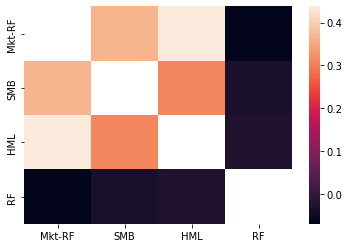

In [10]:
def display_correlation(df,list_maxmin=True):
    
    corrmat = df.corr()
    #ignore self-correlation
    corrmat[corrmat==1] = None
    sns.heatmap(corrmat)

    if list_maxmin:
        corr_rank = corrmat.unstack().sort_values().dropna()
        pair_max = corr_rank.index[-1]
        pair_min = corr_rank.index[0]

        print(f'MIN Correlation pair is {pair_min}')
        print(f'MAX Correlation pair is {pair_max}')

display_correlation(dfa_factors[:"1980"],True)


MIN Correlation pair is ('Mkt-RF', 'HML')
MAX Correlation pair is ('SMB', 'Mkt-RF')


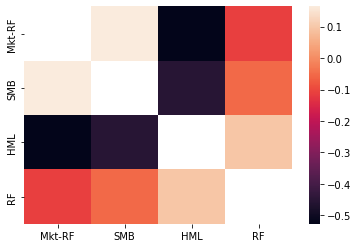

In [11]:
display_correlation(dfa_factors["1981": "2001"],True)

MIN Correlation pair is ('Mkt-RF', 'RF')
MAX Correlation pair is ('SMB', 'Mkt-RF')


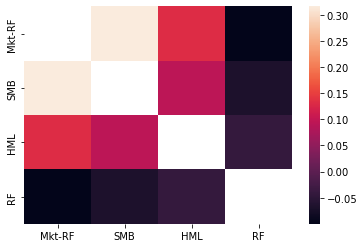

In [12]:
display_correlation(dfa_factors["2002":],True)

MIN Correlation pair is ('Mkt-RF', 'RF')
MAX Correlation pair is ('SMB', 'Mkt-RF')


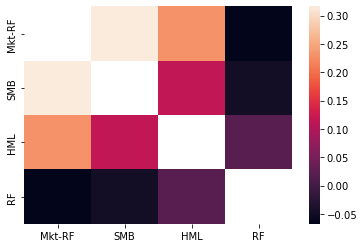

In [13]:
display_correlation(dfa_factors,True)

The 1980 subsample has the highest overall correlations compared to the other two subsamples. But, the correlations between the factors are relatively small overall. The factors have low correlations to other factors.

4.

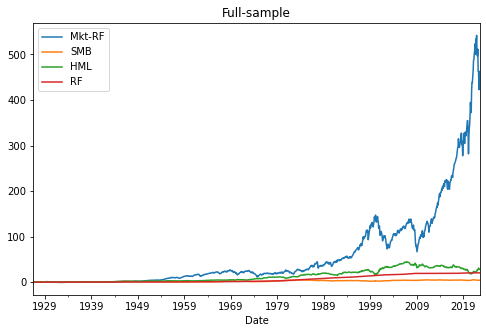

In [14]:
((dfa_factors + 1).cumprod() - 1).plot(figsize=(8,5),title = "Full-sample");


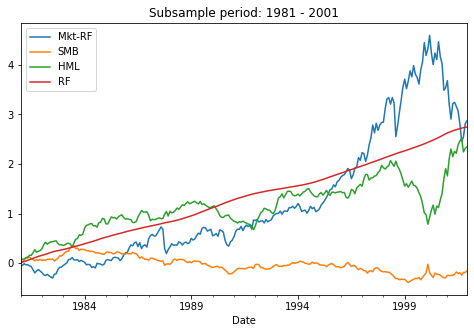

In [15]:
((dfa_factors["1981":"2001"] + 1).cumprod() - 1).plot(figsize=(8,5),title = "Subsample period: 1981 - 2001");


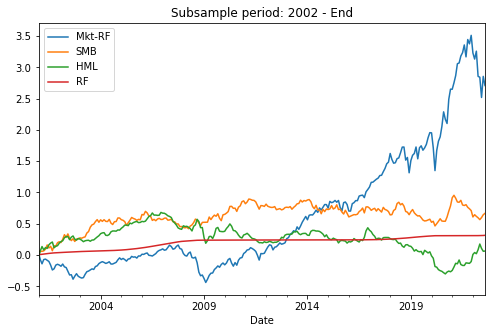

In [16]:
((dfa_factors["2001":] + 1).cumprod() - 1).plot(figsize=(8,5),title = "Subsample period: 2002 - End");


5.
The size factor in the 1981 subsample dips below 0 early on in the sample. The value and market factors have positive premiums in the 1981 subsample. In the 2001 subsample, the size factor has a small premium. The value factor in recent years has dipped below 0 then rallied back a little bit. While the size and value factor performances are not amazing, their low correlation with the market is a big advantage. They should not be ruled out and should be looked into more to see if they can actually be valuable. 

Section 3
CAPM

In [21]:
dfa_portfolio_ex = dfa_portfolio.subtract(dfa_factors['RF'],axis = 'rows')
summary_stats(dfa_portfolio_ex["1981":],12)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Mean,0.0105,0.0957,0.0929,0.1200,0.1321,0.0603,0.1006,0.1066,0.1077,0.1181,...,0.0927,0.0945,0.0936,0.0998,0.1120,0.0889,0.0816,0.0811,0.0671,0.0963
Vol,0.2724,0.2359,0.1972,0.1914,0.2077,0.2457,0.2032,0.1831,0.1792,0.2120,...,0.2036,0.1770,0.1733,0.1733,0.1968,0.1632,0.1549,0.1523,0.1703,0.2058
Sharpe,0.0384,0.4058,0.4711,0.6270,0.6361,0.2453,0.4953,0.5824,0.6012,0.5571,...,0.4551,0.5341,0.5402,0.5756,0.5693,0.5447,0.5271,0.5324,0.3943,0.4681
VaR,-0.1165,-0.0976,-0.0864,-0.0752,-0.0883,-0.1046,-0.0840,-0.0787,-0.0764,-0.0942,...,-0.0839,-0.0734,-0.0756,-0.0693,-0.0833,-0.0753,-0.0656,-0.0704,-0.0756,-0.0985


1. 
No, some of the portfolios with smaller means, have higher volatilities than other portfolios with higher means. You cannot draw the conclusion that the differences in means are explained by differences in the volatilities. Similarly, you cannot explain the differences in mean with the differences in VaR. Mean and VaR have a weak relationship.

CAPM
2.

In [20]:
capm_data = dfa_portfolio_ex.join(dfa_factors['Mkt-RF'])["1981":]

capm_report = pd.DataFrame(index=dfa_portfolio_ex.columns)
rhs = sm.add_constant(capm_data['Mkt-RF'])
bm_residuals = pd.DataFrame(columns=dfa_portfolio_ex.columns)
t_p_values = pd.DataFrame()

for portf in dfa_portfolio_ex.columns:
    lhs = capm_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    capm_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    capm_report.loc[portf, 'beta_hat'] = res.params['Mkt-RF']
    capm_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    capm_report.loc[portf, 'treynor_ratio'] = 12 * capm_data[portf].mean() / res.params['Mkt-RF']
    bm_residuals[portf] = res.resid
    t_p_values.loc[portf, 't-value'] = res.params['const']
    t_p_values.loc[portf, 't-value'] = res.tvalues['const']
    t_p_values.loc[portf, 'p-value'] = round(res.pvalues['const'], 4)
capm_report

,alpha_hat,beta_hat,info_ratio,treynor_ratio
SMALL LoBM,-0.0987,1.3600,-0.5750,0.0077
ME1 BM2,0.0018,1.1702,0.0122,0.0818
ME1 BM3,0.0097,1.0365,0.0857,0.0896
ME1 BM4,0.0425,0.9652,0.3585,0.1243
SMALL HiBM,0.0526,0.9907,0.3778,0.1333
ME2 BM1,-0.0475,1.3433,-0.3677,0.0449
ME2 BM2,0.0101,1.1286,0.0984,0.0892
ME2 BM3,0.0248,1.0193,0.2712,0.1046
ME2 BM4,0.0303,0.9654,0.3094,0.1116
ME2 BM5,0.0292,1.1086,0.2363,0.1066


In CAPM the alphas and information ratios should be zero. The Treynor ratio would also have to equal the mean excess market return.

In [33]:
y = dfa_portfolio_ex["1981":].mean()
X = sm.add_constant(capm_report['beta_hat'])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()
print("R-Squared: ",round(res.rsquared,4))
print("Intercept: ",round((res.params[0] * 12),4))
print("Regression coefficient: ",round((res.params[1] * 12),4))
print("Market: ", round((capm_data['Mkt-RF'].mean() * 12),4))


R-Squared:  0.2582
Intercept:  0.198
Regression coefficient:  -0.0982
Market:  0.0802


3. 
CAPM says that the intercept should be zero. The true intercept is actually .198. Our R-Squared is very low, CAPM says it should be 100% as the market beta is the only risk associated with higher average returns. Our regression estimate should be equal to the mean excess market return, it is not.

4. 
The data shows that there are risks that matter other than the market beta. R squared is also pretty low. There is no evidence to show that the size and value factors matter as well. The size and value factors need to be investigated more to draw a final conclusion. From the data analysis we did, the size and value factors dont contain premia unrelated to CAPM